In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin.gz
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
/kaggle/input/question-pairs-dataset/questions.csv


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup


In [145]:
df = pd.read_csv('/kaggle/input/question-pairs-dataset/questions.csv')


In [146]:
new_df = df.sample(90000,random_state=1)


In [147]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate
236588,236588,466074,466075,What are good gifts for a foreign visitor to b...,What are good gifts for a foreign visitor to b...,0
284623,284623,413904,559402,What's a good alternative cut to brisket if I ...,What is the best wood to smoke brisket?,0
37445,37445,74608,74609,Which horror movie has the most jump scares?,Is it possible to create a good horror film wi...,0
299330,299330,587921,587922,What's your ethical take on the vegetarian vs ...,Can a non vegetarian date a vegetarian?,0
204421,204421,403323,403324,What are some good tips for young biotech ente...,What must young entrepreneurs know before they...,0


In [148]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []
    
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_decontracted.append(word)
    q = ' '.join(q_decontracted)
    
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    #removing html tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [149]:
preprocess("I've already! wasn't <b>done</b>?")


'i have already  was not done'

In [150]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [151]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
236588,236588,466074,466075,what are good gifts for a foreign visitor to b...,what are good gifts for a foreign visitor to b...,0
284623,284623,413904,559402,what is a good alternative cut to brisket if i...,what is the best wood to smoke brisket,0
37445,37445,74608,74609,which horror movie has the most jump scares,is it possible to create a good horror film wi...,0
299330,299330,587921,587922,what is your ethical take on the vegetarian vs...,can a non vegetarian date a vegetarian,0
204421,204421,403323,403324,what are some good tips for young biotech ente...,what must young entrepreneurs know before they...,0


In [152]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [153]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [154]:
# new_df.head()

In [155]:
def common_words(row):
    w1 = set(row['question1'].split(" "))
    w2 = set(row['question2'].split(" "))
    return len(w1&w2)



In [156]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
# new_df.head()

In [157]:
def total_words(row):
    w1 = set(row['question1'].split(" "))
    w2 = set(row['question2'].split(" "))
    return (len(w1)+ len(w2))

new_df['word_total'] = new_df.apply(total_words, axis=1)
# new_df.head()

In [158]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
236588,236588,466074,466075,what are good gifts for a foreign visitor to b...,what are good gifts for a foreign visitor to b...,0,120,119,24,24,20,42,0.48
284623,284623,413904,559402,what is a good alternative cut to brisket if i...,what is the best wood to smoke brisket,0,61,38,13,8,4,21,0.19
37445,37445,74608,74609,which horror movie has the most jump scares,is it possible to create a good horror film wi...,0,43,63,8,12,3,20,0.15
299330,299330,587921,587922,what is your ethical take on the vegetarian vs...,can a non vegetarian date a vegetarian,0,76,38,14,7,2,17,0.12
204421,204421,403323,403324,what are some good tips for young biotech ente...,what must young entrepreneurs know before they...,0,55,62,9,10,2,19,0.11


# Advanced Features

In [159]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    STOP_WORDS = stopwords.words('english')

    token_features = [0.0]*8

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    common_word_count = len(q1_words.intersection(q2_words))
    common_stop_count = len(q1_stops.intersection(q2_stops))


    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [160]:
token_features = new_df.apply(fetch_token_features, axis =1)
new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [161]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
236588,236588,466074,466075,what are good gifts for a foreign visitor to b...,what are good gifts for a foreign visitor to b...,0,120,119,24,24,...,42,0.48,0.909083,0.909083,0.999990,0.999990,0.833330,0.833330,1.0,1.0
284623,284623,413904,559402,what is a good alternative cut to brisket if i...,what is the best wood to smoke brisket,0,61,38,13,8,...,21,0.19,0.249994,0.166664,0.749981,0.428565,0.499994,0.307690,0.0,1.0
37445,37445,74608,74609,which horror movie has the most jump scares,is it possible to create a good horror film wi...,0,43,63,8,12,...,20,0.15,0.749981,0.374995,0.000000,0.000000,0.374995,0.249998,1.0,0.0
299330,299330,587921,587922,what is your ethical take on the vegetarian vs...,can a non vegetarian date a vegetarian,0,76,38,14,7,...,17,0.12,0.666644,0.285710,0.000000,0.000000,0.285710,0.142856,0.0,0.0
204421,204421,403323,403324,what are some good tips for young biotech ente...,what must young entrepreneurs know before they...,0,55,62,9,10,...,19,0.11,0.199996,0.166664,0.249994,0.249994,0.222220,0.199998,0.0,1.0


In [162]:
# !pip install Distance


In [163]:
# import distance
import difflib

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    seq_matcher = difflib.SequenceMatcher(None, q1, q2)
    match = seq_matcher.find_longest_match(0, len(q1), 0, len(q2))
    lcs_len = match.size
    
    length_features[2] = lcs_len / (min(len(q1), len(q2)) + 1)
    
    return length_features


In [164]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [165]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
236588,236588,466074,466075,what are good gifts for a foreign visitor to b...,what are good gifts for a foreign visitor to b...,0,120,119,24,24,...,0.909083,0.999990,0.999990,0.833330,0.833330,1.0,1.0,0.0,24.0,0.783333
284623,284623,413904,559402,what is a good alternative cut to brisket if i...,what is the best wood to smoke brisket,0,61,38,13,8,...,0.166664,0.749981,0.428565,0.499994,0.307690,0.0,1.0,5.0,10.5,0.205128
37445,37445,74608,74609,which horror movie has the most jump scares,is it possible to create a good horror film wi...,0,43,63,8,12,...,0.374995,0.000000,0.000000,0.374995,0.249998,1.0,0.0,4.0,10.0,0.295455
299330,299330,587921,587922,what is your ethical take on the vegetarian vs...,can a non vegetarian date a vegetarian,0,76,38,14,7,...,0.285710,0.000000,0.000000,0.285710,0.142856,0.0,0.0,7.0,10.5,0.410256
204421,204421,403323,403324,what are some good tips for young biotech ente...,what must young entrepreneurs know before they...,0,55,62,9,10,...,0.166664,0.249994,0.249994,0.222220,0.199998,0.0,1.0,1.0,9.5,0.142857


In [166]:
!ping -c 3 pypi.org


/bin/bash: line 1: ping: command not found


In [167]:
# !pip install python-Levenshtein


In [168]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [169]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [170]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
236588,236588,466074,466075,what are good gifts for a foreign visitor to b...,what are good gifts for a foreign visitor to b...,0,120,119,24,24,...,0.833330,1.0,1.0,0.0,24.0,0.783333,95,95,94,97
284623,284623,413904,559402,what is a good alternative cut to brisket if i...,what is the best wood to smoke brisket,0,61,38,13,8,...,0.307690,0.0,1.0,5.0,10.5,0.205128,46,53,44,64
37445,37445,74608,74609,which horror movie has the most jump scares,is it possible to create a good horror film wi...,0,43,63,8,12,...,0.249998,1.0,0.0,4.0,10.0,0.295455,53,68,57,59
299330,299330,587921,587922,what is your ethical take on the vegetarian vs...,can a non vegetarian date a vegetarian,0,76,38,14,7,...,0.142856,0.0,0.0,7.0,10.5,0.410256,39,62,53,72
204421,204421,403323,403324,what are some good tips for young biotech ente...,what must young entrepreneurs know before they...,0,55,62,9,10,...,0.199998,0.0,1.0,1.0,9.5,0.142857,44,47,63,63


In [171]:
new_df.shape


(90000, 28)

In [172]:
# sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')


In [173]:
# sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

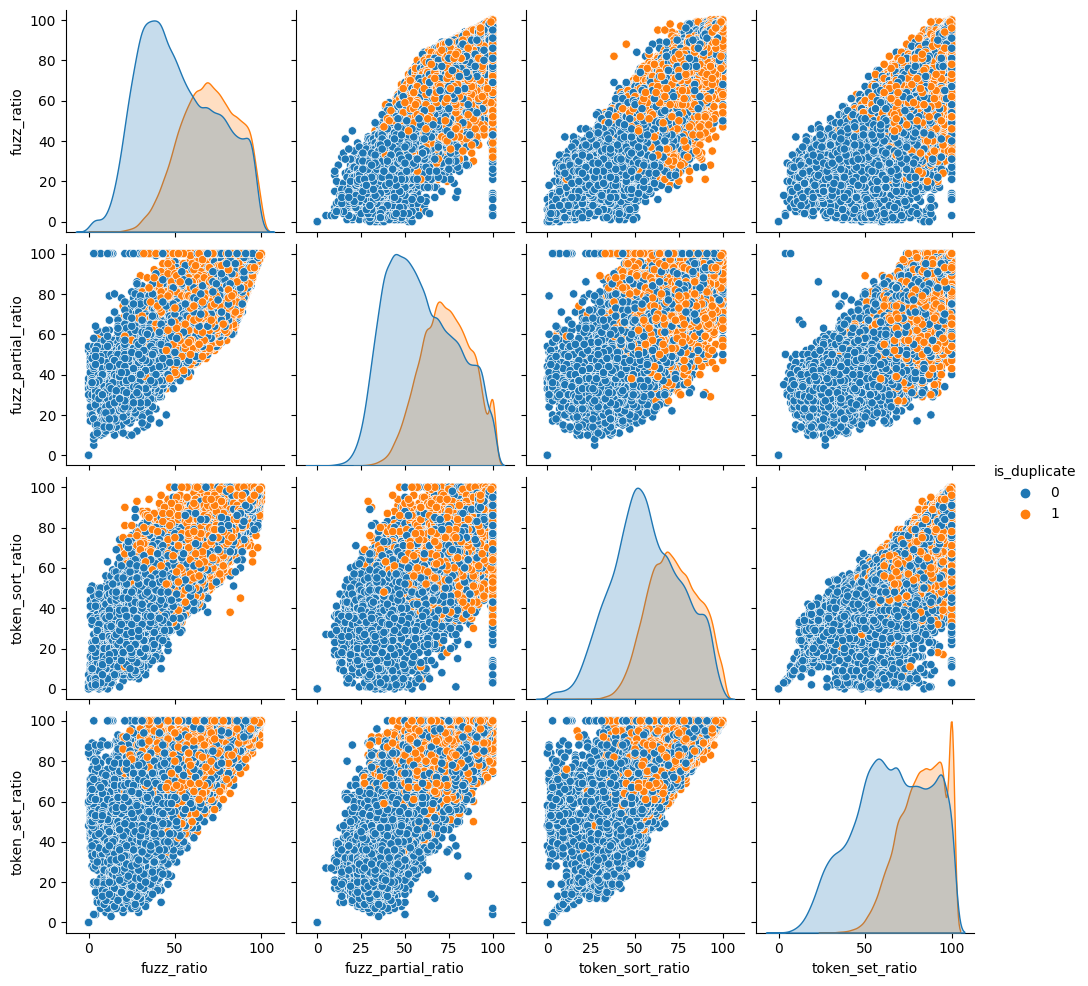

In [174]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')


In [175]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
236588,what are good gifts for a foreign visitor to b...,what are good gifts for a foreign visitor to b...
284623,what is a good alternative cut to brisket if i...,what is the best wood to smoke brisket
37445,which horror movie has the most jump scares,is it possible to create a good horror film wi...
299330,what is your ethical take on the vegetarian vs...,can a non vegetarian date a vegetarian
204421,what are some good tips for young biotech ente...,what must young entrepreneurs know before they...


In [176]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(90000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
236588,0,120,119,24,24,20,42,0.48,0.909083,0.909083,...,0.833330,1.0,1.0,0.0,24.0,0.783333,95,95,94,97
284623,0,61,38,13,8,4,21,0.19,0.249994,0.166664,...,0.307690,0.0,1.0,5.0,10.5,0.205128,46,53,44,64
37445,0,43,63,8,12,3,20,0.15,0.749981,0.374995,...,0.249998,1.0,0.0,4.0,10.0,0.295455,53,68,57,59
299330,0,76,38,14,7,2,17,0.12,0.666644,0.285710,...,0.142856,0.0,0.0,7.0,10.5,0.410256,39,62,53,72
204421,0,55,62,9,10,2,19,0.11,0.199996,0.166664,...,0.199998,0.0,1.0,1.0,9.5,0.142857,44,47,63,63


In [177]:
from gensim.models import KeyedVectors

# Example path - depends on dataset name and file location
path = '/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin'

w2v_model = KeyedVectors.load_word2vec_format(path, binary=True)



In [178]:
(w2v_model['King']).shape

(300,)

In [179]:
import numpy as np

def question_to_vec(question, model, vector_size=300):
    words = question.lower().split()
    word_vecs = []
    for word in words:
        if word in model:
            word_vecs.append(model[word])
    if len(word_vecs) == 0:
        return np.zeros(vector_size)
    return np.mean(word_vecs, axis=0)


In [180]:
temp_df1 = pd.DataFrame()
temp_df2 = pd.DataFrame()
temp_df1 = ques_df['question1'].apply(lambda x: question_to_vec(x, w2v_model))
temp_df2 = ques_df['question2'].apply(lambda x: question_to_vec(x, w2v_model))
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(90000, 2)

In [181]:
temp_df.head()

,question1,question2
236588,"[0.030447388, 0.050271608, 0.05974426, 0.06141...","[0.019185385, 0.039925713, 0.06606039, 0.07034..."
284623,"[0.0010292747, -0.029052908, 0.090784244, 0.15...","[0.023154123, -0.0040893555, 0.10337611, 0.089..."
37445,"[0.06863403, -0.016647339, 0.0051612854, 0.129...","[0.059136964, 0.0032850266, 0.009362793, 0.091..."
299330,"[0.05254909, 0.03403582, 0.095354356, 0.218462...","[0.0041503906, -0.005761719, 0.15742187, 0.292..."
204421,"[0.029724121, 0.08042399, 0.042174444, 0.04933...","[0.006388346, 0.04591878, 0.041042753, 0.03339..."


In [182]:
# Let's say your DataFrame is called temp_df
# Split q1_vec
q1_vecs = pd.DataFrame(temp_df['question1'].to_list(), index=temp_df.index)
q1_vecs = q1_vecs.add_prefix('q1_')

# Split q2_vec
q2_vecs = pd.DataFrame(temp_df['question2'].to_list(), index=temp_df.index)
q2_vecs = q2_vecs.add_prefix('q2_')

# Combine with original DataFrame (or just the index if you like)
tempp_df = pd.concat([temp_df, q1_vecs, q2_vecs], axis=1)

# (Optional) drop the original vector columns if you want
tempp_df = tempp_df.drop(['question1', 'question2'], axis=1)


In [183]:
tempp_df.head()

,q1_0,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,...,q2_290,q2_291,q2_292,q2_293,q2_294,q2_295,q2_296,q2_297,q2_298,q2_299
236588,0.030447,0.050272,0.059744,0.061414,-0.049982,-0.037448,0.001838,-0.050385,0.068115,0.060379,...,-0.069440,0.037900,-0.058524,-0.003020,-0.015875,-0.021767,0.012899,-0.046887,0.056921,-0.010864
284623,0.001029,-0.029053,0.090784,0.153753,-0.074374,0.082309,0.046903,-0.016602,0.076394,0.031312,...,-0.097643,-0.024379,-0.087272,0.027832,0.008405,0.029550,0.053606,0.032410,0.077175,0.025321
37445,0.068634,-0.016647,0.005161,0.129089,-0.002892,-0.060349,-0.049194,-0.063446,0.135529,0.150009,...,-0.210175,0.086499,-0.137134,0.131110,-0.100665,-0.011380,-0.075879,-0.045215,0.052042,-0.028406
299330,0.052549,0.034036,0.095354,0.218462,-0.097229,0.106846,0.088594,-0.053667,0.013502,0.042149,...,0.008496,-0.021973,-0.251318,0.164941,0.101562,0.057724,0.037646,0.134570,0.139453,0.052734
204421,0.029724,0.080424,0.042174,0.049337,-0.052633,-0.006354,-0.003469,-0.061764,-0.078389,0.012231,...,-0.059997,0.036268,-0.166857,-0.047607,-0.042467,-0.002516,0.033013,-0.081896,0.025004,-0.075941


In [184]:
tempp_df.shape

(90000, 600)

In [185]:
final_df = pd.concat([final_df, tempp_df], axis=1)
print(final_df.shape)
final_df.head()

(90000, 623)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,q2_290,q2_291,q2_292,q2_293,q2_294,q2_295,q2_296,q2_297,q2_298,q2_299
236588,0,120,119,24,24,20,42,0.48,0.909083,0.909083,...,-0.069440,0.037900,-0.058524,-0.003020,-0.015875,-0.021767,0.012899,-0.046887,0.056921,-0.010864
284623,0,61,38,13,8,4,21,0.19,0.249994,0.166664,...,-0.097643,-0.024379,-0.087272,0.027832,0.008405,0.029550,0.053606,0.032410,0.077175,0.025321
37445,0,43,63,8,12,3,20,0.15,0.749981,0.374995,...,-0.210175,0.086499,-0.137134,0.131110,-0.100665,-0.011380,-0.075879,-0.045215,0.052042,-0.028406
299330,0,76,38,14,7,2,17,0.12,0.666644,0.285710,...,0.008496,-0.021973,-0.251318,0.164941,0.101562,0.057724,0.037646,0.134570,0.139453,0.052734
204421,0,55,62,9,10,2,19,0.11,0.199996,0.166664,...,-0.059997,0.036268,-0.166857,-0.047607,-0.042467,-0.002516,0.033013,-0.081896,0.025004,-0.075941


In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7928888888888889

In [188]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7991111111111111

In [189]:
from sklearn.metrics import confusion_matrix


In [190]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[9866, 1609],
       [2119, 4406]])

In [191]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[9638, 1837],
       [1779, 4746]])